In [1]:
import meshpy
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib.tri import Triangulation
%matplotlib inline

 - https://stackoverflow.com/questions/4680525/plotting-implicit-equations-in-3d/53931367#53931367

In [2]:
def get_coords(contour, concat=False):
    curves = []
    for i, level in enumerate(contour.levels):
        paths = contour.collections[i].get_paths()
        #print(i, level, paths)
        for path in paths:
            #print(path)
            xy = path.vertices
            z = np.full((xy.shape[0],1), level)
            xyz = np.concatenate((xy, z), axis=1)
            curves.append(xyz)
    if concat and curves:
        curves = np.concatenate(curves, axis=0)
    return curves

In [3]:
def plot_implicit(fn, bbox=(-2.5,2.5)):
    ''' create a plot of an implicit function
    fn  ...implicit function (plot where fn==0)
    bbox ..the x,y,and z limits of plotted interval'''
    xmin, xmax, ymin, ymax, zmin, zmax = bbox*3

    fig, axe = plt.subplots()
    
    A = np.linspace(xmin, xmax, 100) # resolution of the contour
    B = np.linspace(xmin, xmax, 15) # number of slices
    A1,A2 = np.meshgrid(A,A) # grid on which the contour is plotted
    
    points = []
    
    for z in B: # plot contours in the XY plane
        X,Y = A1,A2
        Z = fn(X,Y,z)
        cset = axe.contour(X, Y, Z+z, [z])
        p = get_coords(cset, concat=True)
        p[:,2] = z
        points.append(p)

    # must set plot limits because the contour will likely extend
    # way beyond the displayed level.  Otherwise matplotlib extends the plot limits
    # to encompass all values in the contour.
    #axe.set_zlim3d(zmin,zmax)
    #axe.set_xlim3d(xmin,xmax)
    #axe.set_ylim3d(ymin,ymax)

    return points

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


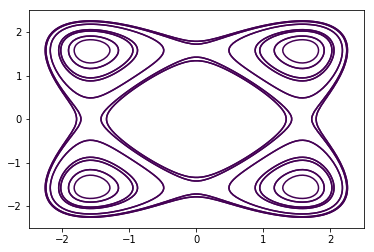

In [4]:
def goursat_tangle(x,y,z):
    a,b,c = 0.0,-5.0,11.8
    return x**4+y**4+z**4+a*(x**2+y**2+z**2)**2+b*(x**2+y**2+z**2)+c

p = plot_implicit(goursat_tangle)

In [5]:
px = np.concatenate(p)

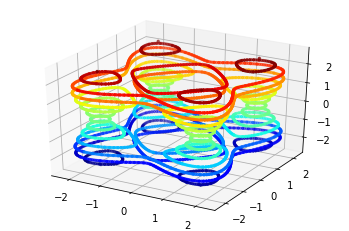

In [6]:
ax = plt.axes(projection='3d')
ax.scatter(*px.T, c=range(px.shape[0]), cmap='jet', marker=".")

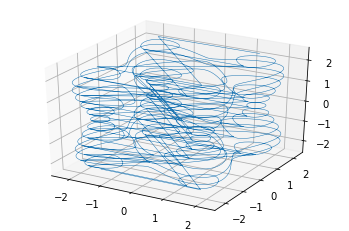

In [7]:
ax = plt.axes(projection='3d')
ax.plot(*px.T, linewidth=0.5)

In [8]:
tri = Triangulation(px[:,0], px[:,1])

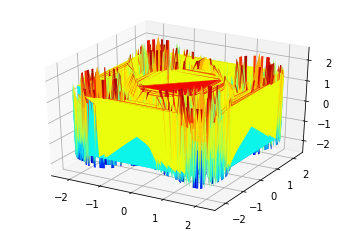

In [9]:
ax = plt.axes(projection='3d')
ax.plot_trisurf(*px.T, triangles=tri.triangles, cmap='jet', antialiased=True)